dict_keys(['__header__', '__version__', '__globals__', 'I', 'J', 'Ky', 'L', 'L0', 'Lpml', 'N', 'Npml', 'Nx', 'Ny', 'R', 'a', 'None', 'c0', 'cx', 'cy', 'dL', 'eps0', 'eps_r', 'i', 'j', 'kx_guess', 'kx_spectra', 'ky_spectra', 'mu0', 'neigs', 'omega_scan', 'radius', 'wvlen_scan', 'xrange', 'yrange', '__function_workspace__'])
(400, 500, 4)
(400, 500)


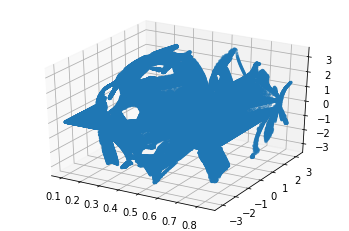

In [2]:
import sys
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from mpl_toolkits.mplot3d import Axes3D


matlab_data =os.path.join('kxky_photonic_circle_bandstructure.mat');
mat = scipy.io.loadmat(matlab_data)
print(mat.keys())
wvlen_scan = np.squeeze(mat['wvlen_scan']);
omega_scan = 1/wvlen_scan;
ky_spectra = np.squeeze(mat['ky_spectra']);
print(ky_spectra.shape)
ky_scan = np.linspace(-np.pi, np.pi, 400);

X,Y = np.meshgrid(omega_scan, ky_scan);
print(X.shape)

#first dimension is ky... second dimension is kx...

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, np.real(ky_spectra[:,:,0]), marker='.')

plt.show();

In [10]:
init_notebook_mode(connected=True)
print(X.shape)

(400, 500)


In [29]:
## do it with plotly
n2 = int(np.prod(X.shape));
subsample = np.random.randint(0,n2, 40000)
trace1 = go.Scatter3d(
    x=X.flatten()[subsample],
    y=Y.flatten()[subsample],
    z=np.real(ky_spectra[:,:,0].flatten()[subsample]),
    mode='markers',
    marker=dict(
        size=3,
        line=dict(
            color='rgba(255,255,255, 0.14)',
            width=0.5
        ),
        opacity=0.1
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [30]:
import plotly.io as pio
img_bytes = pio.to_image(fig, format='png')


ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    C:\Users\zhaon\Anaconda3
    C:\Users\zhaon\Anaconda3\Library\mingw-w64\bin
    C:\Users\zhaon\Anaconda3\Library\usr\bin
    C:\Users\zhaon\Anaconda3\Library\bin
    C:\Users\zhaon\Anaconda3\Scripts
    C:\Users\zhaon\Anaconda3\bin
    C:\Users\zhaon\Anaconda3\condabin
    C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v8.0\bin
    C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v8.0\libnvvp
    C:\Program Files (x86)\Intel\iCLS Client\
    C:\Program Files\Intel\iCLS Client\
    C:\Windows\system32
    C:\Windows
    C:\Windows\System32\Wbem
    C:\Windows\System32\WindowsPowerShell\v1.0\
    C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common
    C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL
    C:\Program Files\Intel\Intel(R) Management Engine Components\DAL
    C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\IPT
    C:\Program Files\Intel\Intel(R) Management Engine Components\IPT
    D:\Program_Files\Sublime Text 3\
    C:\Program Files (x86)\Wolfram Research\WolframScript\
    C:\Program Files\MATLAB\R2017b\runtime\win64
    C:\Program Files\MATLAB\R2017b\bin
    C:\Users\zhaon\.dnx\bin
    C:\Program Files\Microsoft DNX\Dnvm\
    C:\Program Files\Microsoft SQL Server\130\Tools\Binn\
    C:\WINDOWS\system32
    C:\WINDOWS
    C:\WINDOWS\System32\Wbem
    C:\WINDOWS\System32\WindowsPowerShell\v1.0\
    C:\Program Files\MiKTeX 2.9\miktex\bin\x64\
    D:\Program_Files\PuTTY\
    D:\Program_Files\Sublime Text 3
    C:\Program Files (x86)\QuickTime\QTSystem\
    C:\Program Files\Git\cmd
    C:\WINDOWS\System32\OpenSSH\
    C:\Program Files\Amazon\AWSCLI\
    C:\Strawberry\c\bin
    C:\Strawberry\perl\site\bin
    C:\Strawberry\perl\bin
    C:\Program Files\Microsoft SQL Server\Client SDK\ODBC\110\Tools\Binn\
    C:\Program Files (x86)\Microsoft SQL Server\120\Tools\Binn\
    C:\Program Files\Microsoft SQL Server\120\Tools\Binn\
    C:\Program Files\Microsoft SQL Server\120\DTS\Binn\
    C:\Program Files (x86)\Windows Kits\8.1\Windows Performance Toolkit\
    C:\Users\zhaon\AppData\Local\Google\Cloud SDK\google-cloud-sdk\bin
    C:\ProgramData\Julia-0.6.2\bin
    C:\Users\zhaon\AppData\Local\Microsoft\WindowsApps
    C:\Users\zhaon\AppData\Local\atom\bin
    C:\Users\zhaon\AppData\Local\GitHubDesktop\bin
    C:\Program Files\Docker Toolbox

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca.

After installation is complete, no further configuration should be needed. 

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save() 

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python
